<a href="https://colab.research.google.com/github/jyothishri184/Market-basket-Analysis/blob/main/Algorithm_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA LOADING

In [6]:
!pip install pyspark

In [7]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MarketBasketAnalysis").getOrCreate()

In [8]:
df_1 = spark.read.csv("/content/local_output.csv",header=True,inferSchema=True)

In [9]:
df_1

DataFrame[transaction_id: int, product_id: string, product_name: string, quantity: int, transaction_date: date, price: double, customer_id: int, country: string]

#MARKET BASKET ANALYSIS ALGORITHMS

FP-GROWTH ALGORITHM

Apriori algorithm generates all itemsets by scanning the full transactional database. Whereas the FP growth algorithm only generates the frequent itemsets according to the minimum support defined by the user.
FP(Frequent Pattern) Tree is better than Apriori Algorithm.

In [10]:
from pyspark.ml.fpm import FPGrowth
from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F

In [11]:
basketdata = df_1.dropDuplicates(['transaction_id','product_name']).sort('transaction_id')
original_data=basketdata
basketdata.show()
print((basketdata.count(), len(basketdata.columns)))

+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|transaction_id|product_id|        product_name|quantity|transaction_date|price|customer_id|       country|
+--------------+----------+--------------------+--------+----------------+-----+-----------+--------------+
|        536365|    84406B|CREAM CUPID HEART...|       8|      2010-12-01| 2.75|      17850|United Kingdom|
|        536365|     21730|GLASS STAR FROSTE...|       6|      2010-12-01| 4.25|      17850|United Kingdom|
|        536365|    84029G|KNITTED UNION FLA...|       6|      2010-12-01| 3.39|      17850|United Kingdom|
|        536365|    85123A|WHITE HANGING HEA...|       6|      2010-12-01| 2.55|      17850|United Kingdom|
|        536365|    84029E|RED WOOLLY HOTTIE...|       6|      2010-12-01| 3.39|      17850|United Kingdom|
|        536365|     22752|SET 7 BABUSHKA NE...|       2|      2010-12-01| 7.65|      17850|United Kingdom|
|        536365|     71053| 

In [12]:
basketdata = basketdata.groupBy("transaction_id").agg(F.collect_list("product_name")).sort('transaction_id')
basketdata.show()

+--------------+--------------------------+
|transaction_id|collect_list(product_name)|
+--------------+--------------------------+
|        536365|      [SET 7 BABUSHKA N...|
|        536366|      [HAND WARMER UNIO...|
|        536367|      [ASSORTED COLOUR ...|
|        536368|      [BLUE COAT RACK P...|
|        536369|      [BATH BUILDING BL...|
|        536370|      [ROUND SNACK BOXE...|
|        536371|      [PAPER CHAIN KIT ...|
|        536372|      [HAND WARMER UNIO...|
|        536373|      [WOODEN FRAME ANT...|
|        536374|      [VICTORIAN SEWING...|
|        536375|      [WOODEN PICTURE F...|
|        536376|      [HOT WATER BOTTLE...|
|        536377|      [HAND WARMER UNIO...|
|        536378|      [PACK OF 60 DINOS...|
|        536380|      [JAM MAKING SET P...|
|        536381|      [GUMBALL MONOCHRO...|
|        536382|      [ANTIQUE GLASS DR...|
|        536384|      [ENAMEL FLOWER JU...|
|        536385|      [TRADITIONAL CHRI...|
|        536386|      [JUMBO BAG

In [13]:
basketdata = basketdata.withColumnRenamed("collect_list(product_name)","Items")
basketdata.show()

+--------------+--------------------+
|transaction_id|               Items|
+--------------+--------------------+
|        536365|[SET 7 BABUSHKA N...|
|        536366|[HAND WARMER UNIO...|
|        536367|[ASSORTED COLOUR ...|
|        536368|[BLUE COAT RACK P...|
|        536369|[BATH BUILDING BL...|
|        536370|[ROUND SNACK BOXE...|
|        536371|[PAPER CHAIN KIT ...|
|        536372|[HAND WARMER UNIO...|
|        536373|[WOODEN FRAME ANT...|
|        536374|[VICTORIAN SEWING...|
|        536375|[WOODEN PICTURE F...|
|        536376|[HOT WATER BOTTLE...|
|        536377|[HAND WARMER UNIO...|
|        536378|[PACK OF 60 DINOS...|
|        536380|[JAM MAKING SET P...|
|        536381|[GUMBALL MONOCHRO...|
|        536382|[ANTIQUE GLASS DR...|
|        536384|[ENAMEL FLOWER JU...|
|        536385|[TRADITIONAL CHRI...|
|        536386|[JUMBO BAG RED RE...|
+--------------+--------------------+
only showing top 20 rows



In [14]:
fpGrowth = FPGrowth(itemsCol="Items", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(basketdata)

minSupport: It sets the minimum support threshold. The minSupport parameter is a fraction between 0 and 1, and it represents the minimum proportion of transactions that must contain a particular pattern (a set of items) for it to be considered frequent. In this case, the threshold is set to 0.006, which means that a pattern must appear in at least 0.6% of the transactions to be considered frequent.


minConfidence: It sets the minimum confidence threshold for generating association rules. The minConfidence parameter is also a fraction between 0 and 1. It represents the minimum level of confidence required for an association rule to be generated. In this case, it's set to 0.006, which corresponds to 0.6% confidence.

In [15]:
model.freqItemsets.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[12 COLOURED PART...| 139|
|[TRAVEL CARD WALL...| 205|
|[TRAVEL CARD WALL...| 119|
|[JUMBO BAG SCANDI...| 451|
|[JUMBO BAG SCANDI...| 112|
|[JUMBO BAG SCANDI...| 124|
|[JUMBO BAG SCANDI...| 128|
|[JUMBO BAG SCANDI...| 134|
|[JUMBO BAG SCANDI...| 122|
|[JUMBO BAG SCANDI...| 268|
|[JUMBO BAG SCANDI...| 134|
|[JUMBO BAG SCANDI...| 241|
|[JUMBO BAG SCANDI...| 159|
|[JUMBO BAG SCANDI...| 125|
|[JUMBO BAG SCANDI...| 126|
|[JUMBO BAG SCANDI...| 198|
|[JUMBO BAG SCANDI...| 143|
|[JUMBO BAG SCANDI...| 151|
|[JUMBO BAG SCANDI...| 113|
|[JUMBO BAG SCANDI...| 155|
+--------------------+----+
only showing top 20 rows



In [16]:
from pyspark.sql.functions import desc

sorted_data = model.freqItemsets.sort(desc("freq"))
sorted_data.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|[WHITE HANGING HE...|1971|
|[REGENCY CAKESTAN...|1704|
|[JUMBO BAG RED RE...|1600|
|     [PARTY BUNTING]|1380|
|[ASSORTED COLOUR ...|1375|
|[LUNCH BAG RED RE...|1288|
|[SET OF 3 CAKE TI...|1146|
|           [POSTAGE]|1100|
|[LUNCH BAG  BLACK...|1052|
|[PACK OF 72 RETRO...|1029|
|    [SPOTTY BUNTING]|1003|
|[LUNCH BAG SPACEB...| 988|
|[PAPER CHAIN KIT ...| 980|
|[NATURAL SLATE HE...| 967|
|[LUNCH BAG CARS B...| 966|
|[HEART OF WICKER ...| 961|
|[LUNCH BAG PINK P...| 931|
|[LUNCH BAG SUKI D...| 899|
|[JAM MAKING SET W...| 879|
|[ALARM CLOCK BAKE...| 877|
+--------------------+----+
only showing top 20 rows



In [17]:
model.associationRules.show()

+--------------------+--------------------+-------------------+------------------+--------------------+
|          antecedent|          consequent|         confidence|              lift|             support|
+--------------------+--------------------+-------------------+------------------+--------------------+
|[FELTCRAFT GIRL N...|[FELTCRAFT GIRL A...| 0.7529411764705882| 54.73144175317186|0.006905481225722...|
|[JUMBO BAG ALPHAB...|[JUMBO BAG VINTAG...|0.47297297297297297|11.356252625682677|0.007552870090634...|
|[JUMBO BAG ALPHAB...|[JUMBO STORAGE BA...| 0.4155405405405405| 9.951498009637543|0.006635735865343116|
|[JUMBO BAG ALPHAB...|[JUMBO BAG PINK P...|0.46621621621621623| 9.921680578396996|0.007444971946482521|
|[JUMBO BAG ALPHAB...|  [JUMBO BAG APPLES]| 0.4864864864864865|12.559211021606565|0.007768666378938282|
|[SET OF 6 SNACK L...|[SET OF 6 TEA TIM...| 0.6683168316831684|38.833607498680905| 0.00728312473025464|
|[SET OF 6 SNACK L...|[SET OF 12 MINI L...| 0.7425742574257426|3

Association rules describe relationships between items and can be used to understand how frequently items are purchased together and the strength of those associations.

1. antecedent: which are the items typically found together before a purchase.

2. consequent: which are the items that are likely to be purchased if the antecedent items are present.

3. confidence: This is the confidence value, which indicates the probability that the consequent will be purchased when the antecedent is present.

4. lift: The lift value quantifies how much more likely the consequent is to be purchased when the antecedent is present, compared to when the consequent is purchased independently of the antecedent. A lift value greater than 1 indicates a positive association.

5. support: The support count, which represents how frequently the association rule occurs in the dataset.

In [18]:
rules = model.associationRules
model.transform(basketdata).show()

+--------------+--------------------+--------------------+
|transaction_id|               Items|          prediction|
+--------------+--------------------+--------------------+
|        536365|[SET 7 BABUSHKA N...|[LARGE WHITE HEAR...|
|        536366|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536367|[ASSORTED COLOUR ...|[DOORMAT ENGLISH ...|
|        536368|[BLUE COAT RACK P...|[HOMEMADE JAM SCE...|
|        536369|[BATH BUILDING BL...|[HOME BUILDING BL...|
|        536370|[ROUND SNACK BOXE...|[ALARM CLOCK BAKE...|
|        536371|[PAPER CHAIN KIT ...|[HAND WARMER OWL ...|
|        536372|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536373|[WOODEN FRAME ANT...|[WOOD BLACK BOARD...|
|        536374|[VICTORIAN SEWING...|                  []|
|        536375|[WOODEN PICTURE F...|[WOOD BLACK BOARD...|
|        536376|[HOT WATER BOTTLE...|[CANDLEHOLDER PIN...|
|        536377|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536378|[PACK OF 60 DINOS...|[GINGERBREAD MAN ..

In [19]:
transformed = model.transform(basketdata)
transformed.show()

+--------------+--------------------+--------------------+
|transaction_id|               Items|          prediction|
+--------------+--------------------+--------------------+
|        536365|[SET 7 BABUSHKA N...|[LARGE WHITE HEAR...|
|        536366|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536367|[ASSORTED COLOUR ...|[DOORMAT ENGLISH ...|
|        536368|[BLUE COAT RACK P...|[HOMEMADE JAM SCE...|
|        536369|[BATH BUILDING BL...|[HOME BUILDING BL...|
|        536370|[ROUND SNACK BOXE...|[ALARM CLOCK BAKE...|
|        536371|[PAPER CHAIN KIT ...|[HAND WARMER OWL ...|
|        536372|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536373|[WOODEN FRAME ANT...|[WOOD BLACK BOARD...|
|        536374|[VICTORIAN SEWING...|                  []|
|        536375|[WOODEN PICTURE F...|[WOOD BLACK BOARD...|
|        536376|[HOT WATER BOTTLE...|[CANDLEHOLDER PIN...|
|        536377|[HAND WARMER UNIO...|[HAND WARMER OWL ...|
|        536378|[PACK OF 60 DINOS...|[GINGERBREAD MAN ..

In [20]:
print((original_data.count(), len(original_data.columns)))
print((transformed.count(), len(transformed.columns)))

(387773, 8)
(18536, 3)


In [21]:
import pandas as pd
pandas_df = transformed.toPandas()

In [22]:
pandas_df

,transaction_id,Items,prediction
0,536365,"[SET 7 BABUSHKA NESTING BOXES, KNITTED UNION F...","[LARGE WHITE HEART OF WICKER, SET OF 3 HEART C..."
1,536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...","[HAND WARMER OWL DESIGN, HAND WARMER SCOTTY DO..."
2,536367,"[ASSORTED COLOUR BIRD ORNAMENT, IVORY KNITTED ...","[DOORMAT ENGLISH ROSE , DOORMAT HEARTS, DOORMA..."
3,536368,"[BLUE COAT RACK PARIS FASHION, YELLOW COAT RAC...","[HOMEMADE JAM SCENTED CANDLES, JAM MAKING SET ..."
4,536369,[BATH BUILDING BLOCK WORD],[HOME BUILDING BLOCK WORD]
...,...,...,...
18531,581583,"[6 CHOCOLATE LOVE HEART T-LIGHTS, LUNCH BAG RE...","[JUMBO BAG SCANDINAVIAN BLUE PAISLEY, JUMBO BA..."
18532,581584,"[RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...",[]
18533,581585,"[ALARM CLOCK BAKELIKE RED , ZINC T-LIGHT HOLDE...","[ALARM CLOCK BAKELIKE ORANGE, REGENCY CAKESTAN..."
18534,581586,"[DOORMAT RED RETROSPOT, RED RETROSPOT ROUND CA...","[DOORMAT ENGLISH ROSE , DOORMAT HEARTS, DOORMA..."


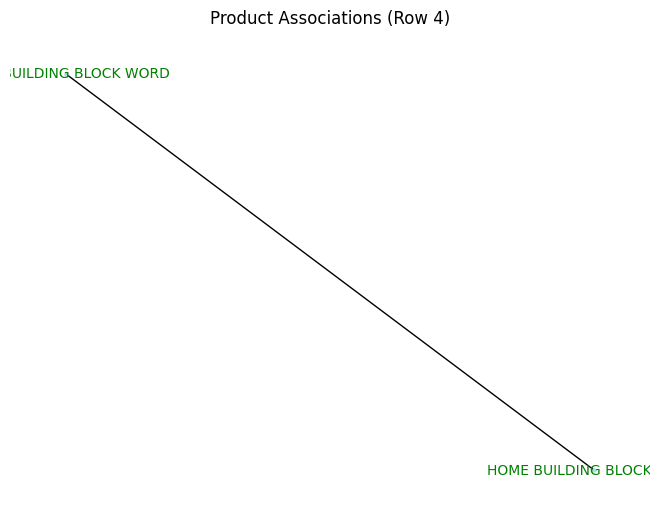

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 4
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()


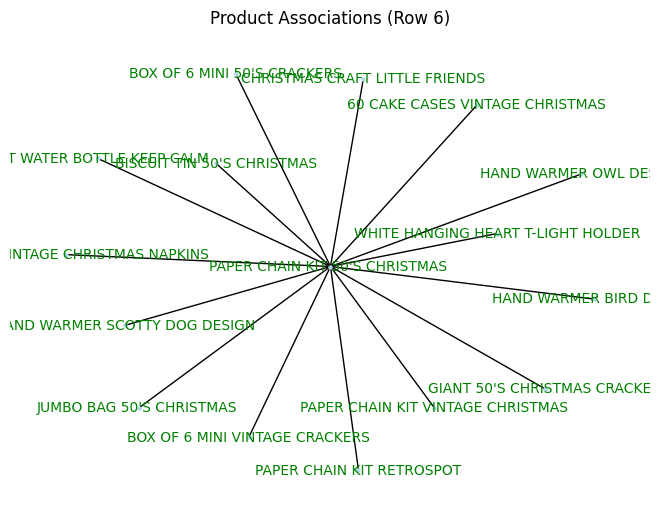

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 6
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()

In [25]:
pandas_df.iloc[12,1:]

Items         [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
prediction    [HAND WARMER OWL DESIGN, HAND WARMER SCOTTY DO...
Name: 12, dtype: object

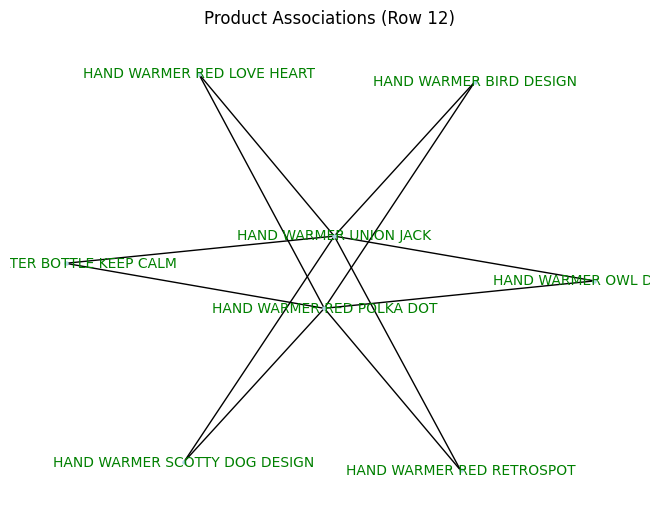

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nth_row = 12
row = pandas_df.iloc[nth_row]


items = row['Items']
predictions = row['prediction']


for item in items:
    for prediction in predictions:
        G.add_edge(item, prediction)


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=5, font_size=10, font_color='green', node_color='lightblue')
plt.title(f"Product Associations (Row {nth_row})")
plt.show()

In [27]:
rules.show()

+--------------------+--------------------+-------------------+------------------+--------------------+
|          antecedent|          consequent|         confidence|              lift|             support|
+--------------------+--------------------+-------------------+------------------+--------------------+
|[FELTCRAFT GIRL N...|[FELTCRAFT GIRL A...| 0.7529411764705882| 54.73144175317186|0.006905481225722...|
|[JUMBO BAG ALPHAB...|[JUMBO BAG VINTAG...|0.47297297297297297|11.356252625682677|0.007552870090634...|
|[JUMBO BAG ALPHAB...|[JUMBO STORAGE BA...| 0.4155405405405405| 9.951498009637543|0.006635735865343116|
|[JUMBO BAG ALPHAB...|[JUMBO BAG PINK P...|0.46621621621621623| 9.921680578396996|0.007444971946482521|
|[JUMBO BAG ALPHAB...|  [JUMBO BAG APPLES]| 0.4864864864864865|12.559211021606565|0.007768666378938282|
|[SET OF 6 SNACK L...|[SET OF 6 TEA TIM...| 0.6683168316831684|38.833607498680905| 0.00728312473025464|
|[SET OF 6 SNACK L...|[SET OF 12 MINI L...| 0.7425742574257426|3

A lift value greater than 1 suggests a positive association, while a value less than 1 suggests a negative association.

LIFT: The lift value quantifies how much more likely the consequent is to be purchased when the antecedent is present, compared to when the consequent is purchased independently of the antecedent.

In [28]:
min_lift = 1.5

filtered_lift_rules = rules.filter(rules.lift >= min_lift)

count = filtered_lift_rules.count()
print(rules.count())
print("Number of rules greater than the minimum lift: ", count)


3924
Number of rules greater than the minimum lift:  3884


 Confidence - the probability that the a item will be purchased when the other is present.

 since confidence is probability confidence greater than 0.7 would be good

In [29]:
min_confidence = 0.7

filtered_confidence_rules = rules.filter(rules.confidence >= min_confidence)

count = filtered_confidence_rules.count()
print(rules.count())
print("Number of rules greater than the minimum confidence: ", count)

3924
Number of rules greater than the minimum confidence:  567


support: The support count, which represents how frequently the association rule occurs in the dataset.

Since data set is very large we can take the minimum support to 1%

In [30]:
min_support = 0.01

filtered_support_rules = rules.filter(rules.support >= min_support)

count = filtered_support_rules.count()
print(rules.count())
print("Number of filtered rules based on support:", count)


3924
Number of filtered rules based on support: 761


In [31]:
spark.stop()